In [ ]:
import pandas as pd
import seaborn as sns
import pandas as np
# Reading data
df = pd.read_csv('iris_csv.csv')


In [ ]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['class'] = labelEncoder.fit_transform(df['class'])
df.head()


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[50:60]

,sepallength,sepalwidth,petallength,petalwidth,class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


<AxesSubplot:>

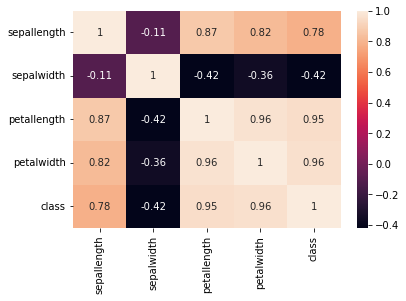

In [ ]:
sns.heatmap(df.corr(), annot = True)
#sns.pairplot( df, hue = 'class', vars =
  #['sepallength', 'sepalwidth', 'petallength', 'petalwidth'])


In [ ]:
X = df.drop(['class'], axis = 1)
y = df['class']


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32

In [ ]:
X

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X, y)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
print(classification_report(y, y_pred))


[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



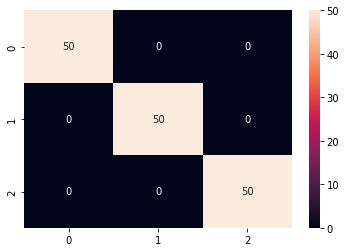

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)

from sklearn.metrics import classification_report, confusion_matrix
y_predict = decision_tree.predict(X)
cm = confusion_matrix(y, y_predict)
sns.heatmap(cm, annot = True)
print(cm)
print(classification_report(y, y_predict))



In [ ]:
# Making Prediction for a new Flower
inputdata = np.array([5.1,3.5,1.4,0.2])
inputdata = inputdata.reshape(1, -1)
predictedValue = decision_tree.predict(inputdata)
print("The predicted class label is: ",predictedValue)


[0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Making Prediction for a new Flower
inputdata = np.array([7.0,3.2,4.7,1.4])
inputdata = inputdata.reshape(1, -1)
predictedValue = decision_tree.predict(inputdata)
print("The predicted class label is: ",predictedValue)



[1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Making Prediction for a new Flower
inputdata = np.array([6.3,3.3,6.0,2.5])
inputdata = inputdata.reshape(1, -1)
predictedValue = decision_tree.predict(inputdata)
print("The predicted class label is: ",predictedValue)



The predicted class label is:  [2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Model Training and Prediction

In [ ]:
features = list(df.columns[:4])
x=pd.DataFrame(df[['sepallength', 'sepalwidth','petallength','petalwidth']])
y=df['class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

In [ ]:
x_train.shape,y_train.shape

((105, 4), (105,))

In [ ]:
x_test.shape,y_test.shape

((45, 4), (45,))

# DECISION TREE CLASSIFIER

In [ ]:
#Building the Model
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)


DecisionTreeClassifier()

# Prediction

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
#Model Evaluation: create classification report and confusion matrix
cn=['setosa', 'versicolor', 'virginica']
from sklearn.metrics import classification_report
y_true = y_test
y_pred =classifier.predict(x_test)

print(classification_report(y_true, y_pred, target_names=cn))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)

cf

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [ ]:
classifier.predict([[6,3.05,3,1.19]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#n_estimators define the underlining decision tree in a Random Forest
clf = RandomForestClassifier(n_estimators=10)
#Train the model usingthe trainingsets y_predict= clf.predict(x_test)
clf.fit(x_train, y_train)

#Prediction on test set
y_pred=clf.predict(x_test)

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
#Model Accuracy
print("Accuracy =", accuracy_score(y_test, y_pred))

Accuracy = 0.9777777777777777


In [ ]:
clf.predict([[6,3.05,3,1.19]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])